In [30]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import functions_ml as fml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, f1_score, jaccard_score, accuracy_score, multilabel_confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.ticker import PercentFormatter
# Set font properties globally (Times New Roman and font size 14)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

In [31]:
# 1. Get dataset
results = pd.read_csv('../datasets/instances_results.csv')
features = pd.read_csv('../datasets/multi_plant_instance_features.csv')
dataset = fml.create_dataset(features, results)

In [32]:
obj_set = dataset[['instance'] + [c for c in dataset.columns if c.startswith('Obj')]]

# Gaps relativos

In [33]:
objective_columns = [col for col in obj_set.columns if col.startswith('Obj_')]
# Initialize a new DataFrame to store deviations
deviation_set = obj_set.copy()

# Calculate the deviation for each row and objective column
for index, row in obj_set.iterrows():
    # Get the objective values for the current row
    objective_values = row[objective_columns]
    
    # Find the minimum objective value (best solution)
    best_obj = objective_values.min()
    
    # Calculate deviations relative to the best solution
    deviations = (objective_values - best_obj) / best_obj
    
    # Update the deviation_set DataFrame
    deviation_set.loc[index, objective_columns] = deviations

deviation_set['Obj_RF_3_1'] = deviation_set['Obj_RF_3_1'].apply(lambda x: np.percentile(deviation_set['Obj_RF_3_1'], 99) if x == np.inf else x)

In [34]:
deviation_set

,instance,Obj_RF_1_0,Obj_RF_2_0,Obj_RF_2_1,Obj_RF_3_0,Obj_RF_3_1,Obj_RF_3_2,Obj_RF_4_0,Obj_RF_4_1,Obj_RF_4_2,Obj_RF_4_3,Obj_RF_6_0,Obj_RF_6_1,Obj_RF_6_2,Obj_RF_6_3,Obj_RF_6_4,Obj_RF_6_5,Obj_RF_T_0
136,NBA00_12_2_60,0.002612,0.001550,0.000465,0.000517,0.000315,0.000464,0.000894,0.000372,0.000216,0.000250,0.000482,0.000331,0.000172,0.000026,0.000038,0.000028,0.000000
459,NBA01_12_15_60,0.000502,0.000164,0.000116,0.000036,0.000102,0.000046,0.000001,0.000000,0.000072,0.000650,0.000037,0.000503,0.000245,0.000522,0.000471,0.000817,0.000400
271,ABB00_12_2_120,0.007079,0.003261,0.001140,0.002009,0.000632,0.000460,0.001272,0.000403,0.000230,0.000137,0.000891,0.000256,0.000079,0.000045,0.000041,0.000018,0.000000
425,NAB02_12_4_60,0.042656,0.010803,0.004090,0.005583,0.005461,0.004441,0.008567,0.000000,0.006060,0.013287,0.003275,0.018010,0.019328,0.035395,0.028456,0.027881,0.089725
452,AAA00_12_2_120,0.084877,0.043647,0.010643,0.029665,0.007681,0.005196,0.014809,0.003247,0.002436,0.003687,0.019121,0.002087,0.001161,0.002435,0.021525,0.032871,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,NAB01_12_2_60,0.087182,0.040066,0.014321,0.038429,0.009614,0.004343,0.024818,0.004633,0.002535,0.000782,0.019280,0.002140,0.000539,0.000327,0.000256,0.000582,0.000000
389,ABA02_12_6_120,0.000451,0.000210,0.000187,0.000156,0.000152,0.000237,0.000133,0.000038,0.000039,0.000134,0.000050,0.000068,0.000048,0.000054,0.000121,0.000096,0.000000
385,NBB04_12_15_10,0.000232,0.000084,0.000059,0.000051,0.000022,0.000001,0.000007,0.000044,0.000000,0.000020,0.000018,0.000069,0.000008,0.000000,0.000000,0.000000,0.000001
166,NAA02_12_20_120,0.054893,0.083747,0.145618,1.133021,0.163450,0.189885,1.385037,1.201356,1.318345,0.308729,1.454743,0.229687,1.433329,0.280812,1.549387,1.512239,0.000000


In [35]:
deviation_set.describe()

,Obj_RF_1_0,Obj_RF_2_0,Obj_RF_2_1,Obj_RF_3_0,Obj_RF_3_1,Obj_RF_3_2,Obj_RF_4_0,Obj_RF_4_1,Obj_RF_4_2,Obj_RF_4_3,Obj_RF_6_0,Obj_RF_6_1,Obj_RF_6_2,Obj_RF_6_3,Obj_RF_6_4,Obj_RF_6_5,Obj_RF_T_0
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.028374,0.026805,0.044533,0.042958,0.045754,0.108264,0.057431,0.042154,0.106782,0.192454,0.100881,0.034100,0.060597,0.135655,0.164807,0.249773,0.055706
std,0.082704,0.100621,0.152129,0.163039,0.155159,0.304751,0.215225,0.160899,0.310330,0.435638,0.306719,0.084536,0.204442,0.376635,0.407349,0.514622,0.150366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000465,0.000203,0.000204,0.000148,0.000126,0.000128,0.000127,0.000090,0.000080,0.000084,0.000050,0.000076,0.000048,0.000030,0.000029,0.000031,0.000000
50%,0.002501,0.001159,0.001566,0.001409,0.001010,0.001929,0.001342,0.000888,0.001147,0.001992,0.000923,0.000758,0.000595,0.000455,0.000660,0.002042,0.000381
75%,0.022122,0.010789,0.015658,0.019294,0.015738,0.026749,0.018302,0.008999,0.014270,0.036899,0.019240,0.028747,0.025477,0.024618,0.034597,0.062867,0.034867
max,1.158370,0.965576,1.337314,1.258880,1.233632,1.573444,1.421661,1.306611,1.550598,1.708855,1.466376,1.151389,1.433329,1.696183,1.797860,1.888921,1.183628


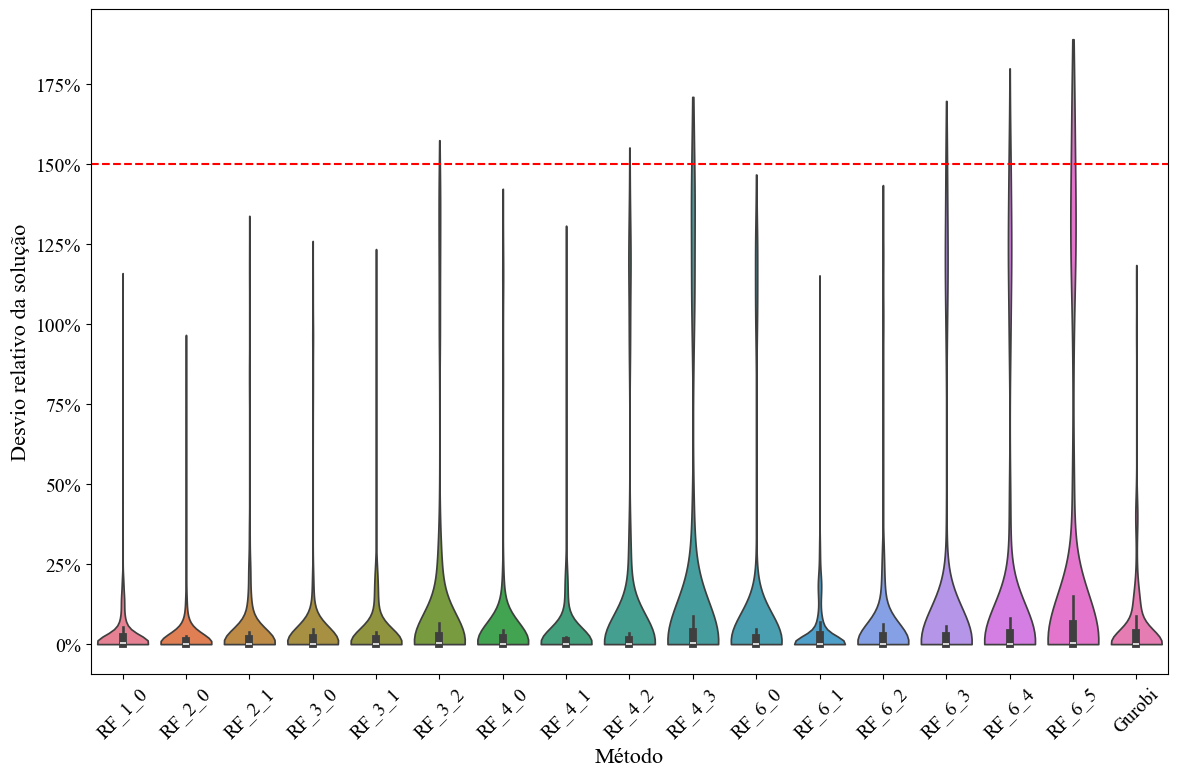

In [36]:
# Prepare the melted DataFrame for violin plotting
melted_dataset = deviation_set.melt(
    id_vars=['instance'], 
    var_name='Method', 
    value_name='Solution quality'
)

# Remove the "Obj_" prefix from the Method column and rename RF_T_0 to "Gurobi"
melted_dataset['Method'] = melted_dataset['Method'].str.replace('Obj_', '')
melted_dataset['Method'] = melted_dataset['Method'].replace({'RF_T_0': 'Gurobi'})

# Generate a violin plot with custom x-labels
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=melted_dataset, 
    x='Method', 
    y='Solution quality', 
    inner="box", 
    palette=None,
    hue='Method',
    legend=False,
    cut=0,
    fill=True,
)
plt.axhline(y=1.5, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Método', fontsize=16)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))  # Use xmax=1 if values are between 0 and 1
plt.ylabel('Desvio relativo da solução', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
# y_ticks = np.arange(0, melted_timeset['Solution quality'].max(), 200)
# plt.yticks(y_ticks, fontsize=14)
plt.tight_layout()
plt.savefig('fig_violin_plot_solution_quality.png', dpi=600, bbox_inches='tight')
plt.show()

# Teste de hipóteses

## Kruskal Wallis

In [37]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*[deviation_set[col] for col in deviation_set.columns if col != 'instance'])
print(f"Kruskal-Wallis Test: statistic={stat:.4f}, p-value={p_value}")

Kruskal-Wallis Test: statistic=155.0273, p-value=7.94293485115744e-25


## Dunn test

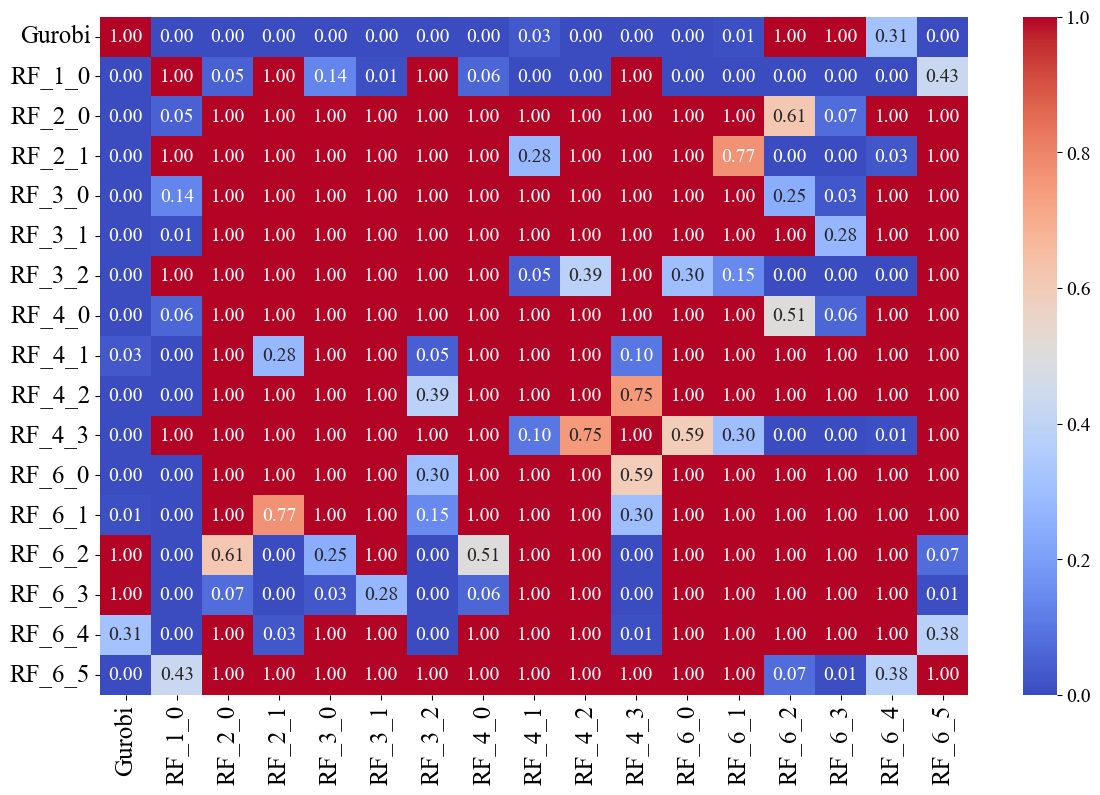

In [38]:
import scikit_posthocs as sp

# Perform Dunn's test for pairwise comparisons using the melted DataFrame
posthoc = sp.posthoc_dunn(
    melted_dataset, 
    val_col='Solution quality',  # Column with values (times)
    group_col='Method',      # Column with groups (methods)
    p_adjust='bonferroni'    # Adjust for multiple comparisons
)

plt.figure(figsize=(12, 8))
sns.heatmap(posthoc, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=posthoc.columns, yticklabels=posthoc.columns)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('fig_dunn_test_solution_quality.png', dpi=600, bbox_inches='tight')
plt.show()